# **Información del dataset**

El dataset contiene información sobre los juegos desarrollados por Gameloft SE hasta Mayo del 2022

**Columnas**



*   Title: Nombre del juego en la Play Store.
*   Summary: Breve resumen sobre el juego.
*   Installs: Número de instalaciones.
*   Score: Puntuación promedio hasta 5.
*   Ratings: Número total de puntuaciones.
*   Reviews: Número total de reseñas dadas.
*   Size: Tamaño del juego.
*   AndroidVersion: Versión más antigua de Android con la que es compatible.
*   GenreId: Género del juego.
*   ContentRating: Clasificación del contenido del juego
*   Released: Fecha de lanzamiento.
*   Update: Última fecha de actualización.
*   Version: Versión actual del juego.
*   AppId: Identificación de la aplicación para Play Store.



**Preguntas**

1. ¿Qué juegos son los más instalados?
2. ¿Qué juego es el de mayor puntuación?
3. ¿Cuántos juegos fueron lanzados en el año 2021?
4. ¿En que año hubo más lanzamientos?
5. ¿Qué género es el más instalado?
6. ¿Qué nivel de clasificación es el más instalado?

#  **Importar de Librerías**

In [1]:
#Importacion de librerias

#Procesamiento
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns
import plotly.graph_objects as go

In [2]:
juegos=pd.read_csv('/kaggle/input/gameloft-android-games-collection-2022/data.csv',encoding = 'ISO-8859-1')

In [3]:
juegos.head()

,title,summary,installs,score,ratings,reviews,size,androidVersion,genreId,contentRating,released,updated,version,appId
0,Asphalt 8 - Car Racing Game,Racing multiplayer online game. Drive cars and...,100000000,4.474443,10191799,280041,177M,5.0,RACING,Everyone 10+,2013-08-20,2022-04-18,6.2.3b,com.gameloft.android.ANMP.GloftA8HM
1,Asphalt Nitro,Car racing game with luxury licensed brands,100000000,4.285882,1743070,16204,46M,4.1,RACING,Everyone,2015-11-05,2022-03-21,1.7.5a,com.gameloft.android.ANMP.GloftAGHM
2,Asphalt 9: Legends,Online multiplayer street auto racing game wit...,50000000,4.471972,2443874,61954,Varies with device,7.0,RACING,Everyone 10+,2018-07-25,2022-04-28,3.4.5a,com.gameloft.android.ANMP.GloftA9HM
3,Real Football,Experience soccer both on and off the pitch wi...,50000000,3.766698,970452,4662,31M,4.4,SPORTS,Everyone 10+,2016-09-29,2021-08-24,1.7.2,com.gameloft.android.ANMP.GloftR7HM
4,Sniper Fury: Shooting Game,A 3D sniping game to hunt elite hitmen and sho...,50000000,4.324803,1025668,20414,71M,5.0,ACTION,Mature 17+,2015-12-02,2022-02-02,6.2.2a,com.gameloft.android.ANMP.GloftFWHM


In [4]:
juegos.tail()

,title,summary,installs,score,ratings,reviews,size,androidVersion,genreId,contentRating,released,updated,version,appId
35,War Planet Online: MMO Game,Be a war lord. Conquer the world. Build an arm...,5000000,4.239910,98200,3461,832M,5.0,STRATEGY,Everyone 10+,2017-08-30,2022-04-21,4.5.1,com.gameloft.android.ANMP.GloftW2HM
36,Paddington Run game,Infinite run through London with Paddington co...,1000000,3.960000,10353,249,32M,4.1,ACTION,Everyone,2017-10-25,2020-10-20,1.2.6a,com.gameloft.android.ANMP.GloftDTHM
37,Dungeon Hunter Champions,Online action RPG fight in live PVP 5v5 battle...,1000000,3.699357,47672,2723,Varies with device,4.4,ROLE_PLAYING,Teen,2018-05-02,2021-02-01,1.8.36,com.gameloft.android.ANMP.GloftD6HM
38,Order & Chaos Online 3D MMORPG,Battle Orcs and Demons in a massive multiplaye...,5000000,4.347230,475583,36629,37M,4.1,ROLE_PLAYING,Teen,2011-06-20,2021-12-15,4.2.5a,com.gameloft.android.ANMP.GloftMMHM
39,Rival Knights,Adventure challenge game to battle for glory a...,5000000,4.274475,355751,11280,31M,4.0,ACTION,Teen,2014-06-04,2021-04-15,1.2.4b,com.gameloft.android.ANMP.GloftOKHM


Visualizamos el tamaño del dataset

In [5]:
juegos.shape

(40, 14)

Chequeo de nulos

In [6]:
juegos.isnull().sum()

title             0
summary           0
installs          0
score             0
ratings           0
reviews           0
size              0
androidVersion    0
genreId           0
contentRating     0
released          0
updated           0
version           0
appId             0
dtype: int64

Podemos observar que a ninguna columna le faltan datos

Visualizar el tipo de dato de las columnas

In [7]:
juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           40 non-null     object 
 1   summary         40 non-null     object 
 2   installs        40 non-null     int64  
 3   score           40 non-null     float64
 4   ratings         40 non-null     int64  
 5   reviews         40 non-null     int64  
 6   size            40 non-null     object 
 7   androidVersion  40 non-null     object 
 8   genreId         40 non-null     object 
 9   contentRating   40 non-null     object 
 10  released        40 non-null     object 
 11  updated         40 non-null     object 
 12  version         40 non-null     object 
 13  appId           40 non-null     object 
dtypes: float64(1), int64(3), object(10)
memory usage: 4.5+ KB


Convertir el tipo de dato de las columnas

In [8]:
juegos['released'].unique()

array(['2013-08-20', '2015-11-05', '2018-07-25', '2016-09-29',
       '2015-12-02', '2017-03-27', '2013-06-19', '2017-03-29',
       '2012-11-28', '2013-11-14', '2014-07-23', '2013-06-13',
       '2012-11-08', '2014-12-17', '2017-05-24', '2015-01-07',
       '2017-09-27', '2016-03-17', '2013-09-10', '2020-04-15',
       '2016-08-22', '2013-09-19', '2019-10-09', '2015-12-17',
       '2012-03-15', '2012-11-21', '2017-04-26', '2014-08-06',
       '2015-03-11', '2015-08-04', '2013-05-09', '2021-10-26',
       '2012-12-05', '2012-04-05', '2015-09-16', '2017-08-30',
       '2017-10-25', '2018-05-02', '2011-06-20', '2014-06-04'],
      dtype=object)

In [9]:
juegos['released'] = pd.to_datetime(juegos['released'])


In [10]:
juegos['updated'].unique()

array(['2022-04-18', '2022-03-21', '2022-04-28', '2021-08-24',
       '2022-02-02', '2020-10-15', '2022-03-30', '2021-07-14',
       '2018-05-25', '2021-10-29', '2021-10-07', '2022-02-03',
       '2022-04-14', '2022-02-10', '2020-09-29', '2022-04-19',
       '2021-03-18', '2022-04-22', '2021-08-25', '2020-07-16',
       '2020-07-17', '2021-01-18', '2020-12-10', '2020-12-07',
       '2021-01-13', '2021-06-15', '2022-04-26', '2022-04-12',
       '2021-01-11', '2022-03-29', '2021-02-24', '2018-08-13',
       '2022-04-21', '2020-10-20', '2021-02-01', '2021-12-15',
       '2021-04-15'], dtype=object)

In [11]:
juegos['updated'] = pd.to_datetime(juegos['updated'])

In [12]:
juegos.dtypes

title                     object
summary                   object
installs                   int64
score                    float64
ratings                    int64
reviews                    int64
size                      object
androidVersion            object
genreId                   object
contentRating             object
released          datetime64[ns]
updated           datetime64[ns]
version                   object
appId                     object
dtype: object

Obtener los años y meses de lanzamiento y de última actualizacion

In [13]:
juegos["released_year"]=juegos["released"].dt.year
juegos["released_month"]=juegos["released"].dt.month
juegos["updated_year"]=juegos["updated"].dt.year
juegos["updated_month"]=juegos["updated"].dt.month

In [14]:
juegos.head(2)

,title,summary,installs,score,ratings,reviews,size,androidVersion,genreId,contentRating,released,updated,version,appId,released_year,released_month,updated_year,updated_month
0,Asphalt 8 - Car Racing Game,Racing multiplayer online game. Drive cars and...,100000000,4.474443,10191799,280041,177M,5.0,RACING,Everyone 10+,2013-08-20,2022-04-18,6.2.3b,com.gameloft.android.ANMP.GloftA8HM,2013,8,2022,4
1,Asphalt Nitro,Car racing game with luxury licensed brands,100000000,4.285882,1743070,16204,46M,4.1,RACING,Everyone,2015-11-05,2022-03-21,1.7.5a,com.gameloft.android.ANMP.GloftAGHM,2015,11,2022,3


Eliminando columnas que no serán necesarias para el análisis

In [15]:
juegos=juegos.drop(["released","updated","appId"], axis=1)

In [16]:
juegos.head(2)

,title,summary,installs,score,ratings,reviews,size,androidVersion,genreId,contentRating,version,released_year,released_month,updated_year,updated_month
0,Asphalt 8 - Car Racing Game,Racing multiplayer online game. Drive cars and...,100000000,4.474443,10191799,280041,177M,5.0,RACING,Everyone 10+,6.2.3b,2013,8,2022,4
1,Asphalt Nitro,Car racing game with luxury licensed brands,100000000,4.285882,1743070,16204,46M,4.1,RACING,Everyone,1.7.5a,2015,11,2022,3


# Visualizaciones

## 1. ¿Qué juego es el más instalado(descargado)?

In [17]:
juegos[juegos["installs"]==juegos["installs"].max()].T

,11
title,Minion Rush: Running Game
summary,Official Minions and Despicable Me endless run...
installs,500000000
score,4.5919
ratings,10724213
reviews,608639
size,127M
androidVersion,5.0
genreId,CASUAL
contentRating,Everyone 10+



* El juego con mayor número de descargas es el *Minion Rush: Running Game* con un total de 500 millones de descargas

Ahora veamos el Top 10 de juegos más descargados

**Top 10 juegos con más descargas**

In [18]:
top_10=juegos[["title","installs"]]

In [19]:
top_10=top_10.sort_values("installs").tail(10)

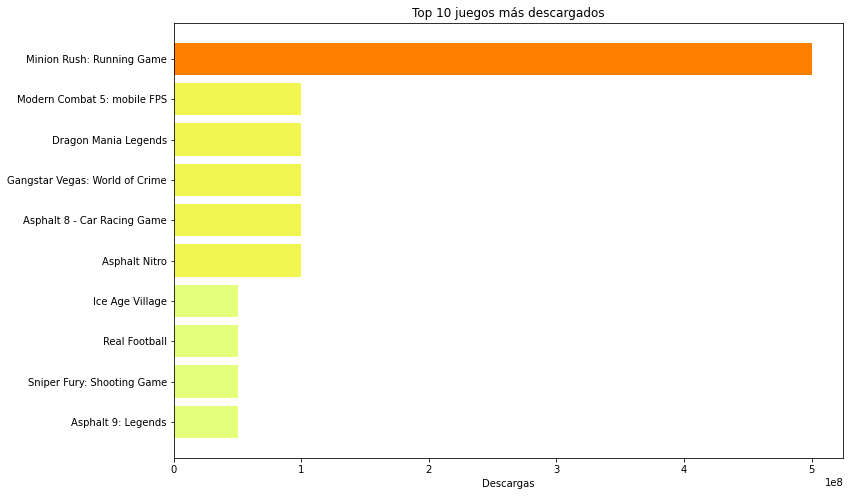

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

normdata = colors.Normalize(min(top_10["installs"]), max(top_10["installs"]))
colormap = cm.get_cmap("Wistia")
colores =colormap(normdata(top_10["installs"]))

ax.barh(top_10["title"], top_10["installs"],color=colores)

plt.xlabel("Descargas")
plt.title("Top 10 juegos más descargados")
plt.show()

## 2. ¿Qué juego tiene mayor puntuación?

In [21]:
juegos[juegos["score"]==juegos["score"].max()].T

,11
title,Minion Rush: Running Game
summary,Official Minions and Despicable Me endless run...
installs,500000000
score,4.5919
ratings,10724213
reviews,608639
size,127M
androidVersion,5.0
genreId,CASUAL
contentRating,Everyone 10+


*   Observamos que el juego con mayor score es *Minion Rush: Running Game*

Ahora veamos el Top 10 de los juegos mejor valorados

**Top 10 juegos mejor valorados**

In [22]:
score=juegos[["title","score"]]

In [23]:
score=score.sort_values("score").tail(10)

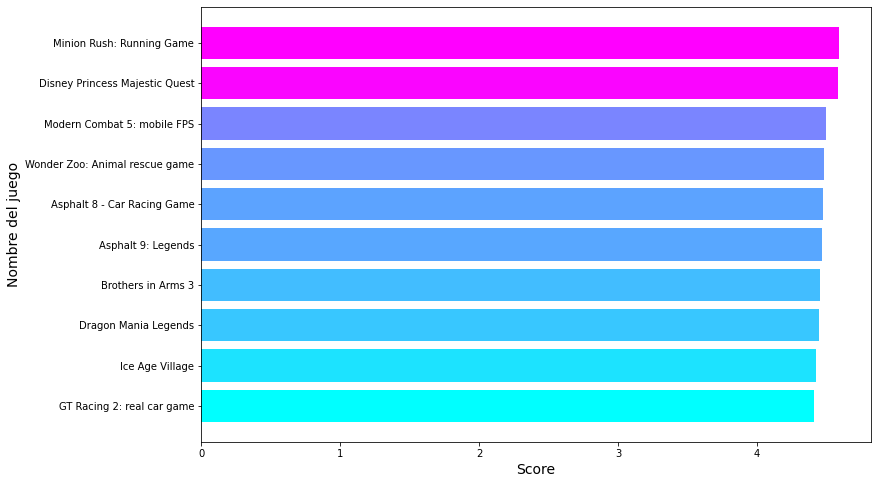

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

normdata = colors.Normalize(min(score["score"]), max(score["score"]))
colormap = cm.get_cmap("cool")
colores =colormap(normdata(score["score"]))

ax.barh(score["title"], score["score"],color=colores)
ax.set_xlabel("Score",fontdict = {'fontsize':14})
ax.set_ylabel("Nombre del juego",fontdict = {'fontsize':14})
plt.show()

## 3. ¿Cuántos juegos fueron lanzados en 2021 y en que año hubo más lanzamientos?

In [25]:
released=juegos[["released_year","title"]].groupby("released_year").agg({"title":"count"}).rename(columns={"title":"total_released"})
released.reset_index(inplace=True)
released

,released_year,total_released
0,2011,1
1,2012,6
2,2013,7
3,2014,4
4,2015,7
5,2016,3
6,2017,7
7,2018,2
8,2019,1
9,2020,1


*  Vemos que en el año 2021 solo lanzaron 1 juego.
*   Los años en donde se lanzaron más juegos fueron en el 2013, 2015 y 2017.

**Cantidad de juegos lanzados por año**

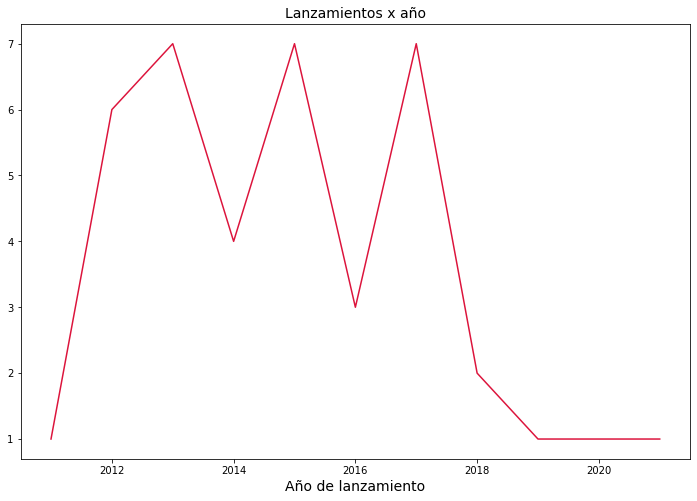

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(released["released_year"], released["total_released"],color="crimson")
ax.set_title("Lanzamientos x año",fontdict = {'fontsize':14})
ax.set_xlabel("Año de lanzamiento",fontdict = {'fontsize':14})

plt.show()

## 4. ¿Qué genero es el más instalado?

In [27]:
genero=juegos[["genreId","installs"]].groupby("genreId").agg({"installs":"sum"}).rename(columns={"installs":"total_installs"})
genero.reset_index(inplace=True)
genero=genero.sort_values("total_installs",ascending=False)
genero

,genreId,total_installs
3,CASUAL,630000000
0,ACTION,346000000
5,RACING,260000000
1,ADVENTURE,150000000
7,SIMULATION,60000000
8,SPORTS,50000000
6,ROLE_PLAYING,46500000
9,STRATEGY,45000000
2,ARCADE,15000000
4,PUZZLE,5000000


*   Vemos que el género con mayor número de instalaciones es *CASUAL*

Ahora veamos estos datos en un diagrama de barras vertical.

**Diagrama barras - género**

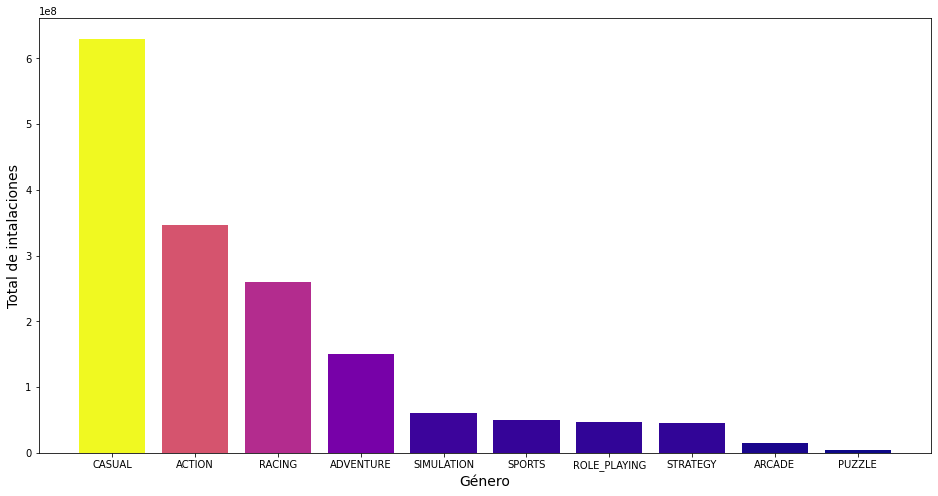

In [28]:
fig, ax = plt.subplots(figsize=(16,8))
normdata = colors.Normalize(min(genero["total_installs"]), max(genero["total_installs"]))
colormap = cm.get_cmap("plasma")
colores =colormap(normdata(genero["total_installs"]))

ax.bar(genero["genreId"],genero["total_installs"],color=colores)
ax.set_xlabel("Género", fontdict={'fontsize':14})
ax.set_ylabel("Total de intalaciones", fontdict={'fontsize':14})
plt.show()

## 5. ¿Qué nivel de clasificación es el más instalado?

In [29]:
clasificacion=juegos[["contentRating","installs"]].groupby("contentRating").agg({"installs":"sum"}).rename(columns={"installs":"total_installs"})
clasificacion.reset_index(inplace=True)
clasificacion=clasificacion.sort_values("total_installs",ascending=False)
clasificacion

,contentRating,total_installs
1,Everyone 10+,835000000
0,Everyone,406000000
2,Mature 17+,280000000
3,Teen,86500000


* Observamos que la clasifición más descargas es *Everyone 10+* con un total de 835 millones.

Ahora veamos un diagrama circular con los porcentajes respectivos de cada clasificación de contenido

**Diagrama circular-clasificación de contenido**

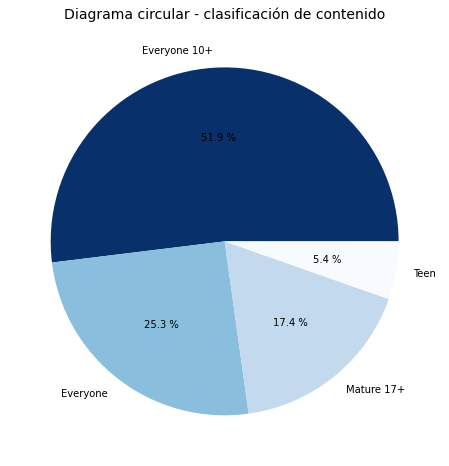

In [30]:


normdata = colors.Normalize(min(clasificacion["total_installs"]), max(clasificacion["total_installs"]))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(clasificacion["total_installs"]))

fig, ax = plt.subplots(figsize=(12,8))
ax.pie(clasificacion["total_installs"], labels=clasificacion["contentRating"],autopct="%0.1f %%",colors=colores)
ax.set_title("Diagrama circular - clasificación de contenido", fontdict={'fontsize':14})
plt.show()
